Name: **Ruturaj Kiran Patil**<br>
Div: **BE09-S09**<br>
Roll no: **43165**<br>
Title: **Assignment 2: Implementing Feedforward neural networks with Keras and TensorFlow**<br>

In [4]:
#installations
from sklearn.preprocessing import LabelBinarizer #One vs All fashion
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential #one input tensor and one output tensor
from tensorflow.keras.layers import Dense #layered model
from tensorflow.keras.optimizers import SGD #gradient descent
from tensorflow.keras.datasets import mnist #dataset 
from tensorflow.keras import backend as K #model level library
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [6]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [7]:
#building the model
model = Sequential()

#dimensionality of output space and activation function
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

2022-11-01 19:00:37.721518: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-01 19:00:37.721984: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-01 19:00:37.722020: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ruturaj-inspiron-3576): /proc/driver/nvidia/version does not exist
2022-11-01 19:00:37.723080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10


2022-11-01 19:00:41.572461: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 2s 3ms/step - loss: 2.2846 - accuracy: 0.1688 - val_loss: 2.2529 - val_accuracy: 0.2620
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 2.2280 - accuracy: 0.3311 - val_loss: 2.1972 - val_accuracy: 0.5213
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 2.1647 - accuracy: 0.4717 - val_loss: 2.1222 - val_accuracy: 0.4866
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 2.0771 - accuracy: 0.5333 - val_loss: 2.0163 - val_accuracy: 0.5670
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 1.9552 - accuracy: 0.5761 - val_loss: 1.8735 - val_accuracy: 0.6074
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 1.7986 - accuracy: 0.6141 - val_loss: 1.7002 - val_accuracy: 0.6559
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 1.6205 - accuracy: 0.6513 - val_loss: 1.5160 - val_accuracy: 0.7043
Epoch 8/10
469/46

In [9]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.97      0.87       980
           1       0.79      0.99      0.88      1135
           2       0.85      0.81      0.83      1032
           3       0.68      0.81      0.74      1010
           4       0.77      0.80      0.78       982
           5       0.90      0.37      0.53       892
           6       0.84      0.90      0.87       958
           7       0.77      0.88      0.82      1028
           8       0.83      0.66      0.74       974
           9       0.74      0.63      0.68      1009

    accuracy                           0.79     10000
   macro avg       0.80      0.78      0.77     10000
weighted avg       0.80      0.79      0.78     10000



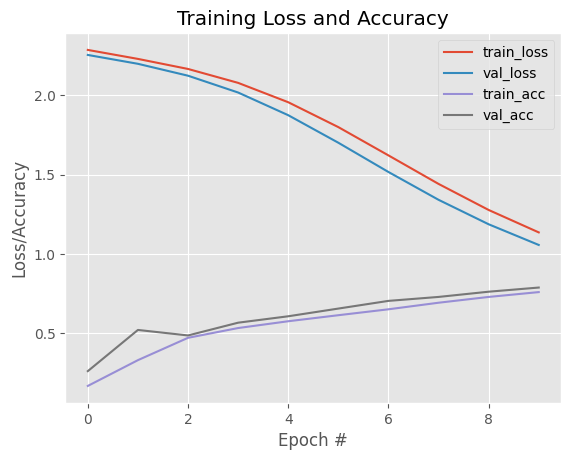

In [10]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()